In [20]:
import pickle
import pandas as pd
import numpy as np
import datetime  
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import folium
from folium.plugins import HeatMap
from math import floor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix
from sqlalchemy import create_engine
from sqlalchemy import text
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import DBSCAN, OPTICS
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import csv
from shapely.geometry import Point, Polygon
import time
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
import dask.dataframe as dd
from sklearn.neighbors import KNeighborsClassifier
import eli5
from eli5.sklearn import PermutationImportance

In [21]:
df = pd.read_csv('DOW_Taxi_Test.csv')
df

,Unnamed: 0,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips,total_flags
0,21,-73.982155,40.767937,17,0,50,82.0,0.0,2
1,43,-73.982185,40.768375,17,0,50,82.0,0.0,2
2,65,-73.981796,40.768520,17,0,50,82.0,0.0,2
3,87,-73.982414,40.768234,17,0,50,82.0,0.0,2
4,109,-73.982101,40.768131,17,0,50,82.0,0.0,2
...,...,...,...,...,...,...,...,...,...
1210482,22274641,-73.997772,40.765095,19,6,398,0.0,23.0,2
1210483,22274656,-73.946228,40.821091,19,2,130,16.0,0.0,2
1210484,22274657,-74.004143,40.713058,3,4,406,2.0,0.0,2
1210485,22274659,-73.985336,40.736019,4,2,385,3.0,0.0,2


In [22]:
df

,Unnamed: 0,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips,total_flags
0,21,-73.982155,40.767937,17,0,50,82.0,0.0,2
1,43,-73.982185,40.768375,17,0,50,82.0,0.0,2
2,65,-73.981796,40.768520,17,0,50,82.0,0.0,2
3,87,-73.982414,40.768234,17,0,50,82.0,0.0,2
4,109,-73.982101,40.768131,17,0,50,82.0,0.0,2
...,...,...,...,...,...,...,...,...,...
1210482,22274641,-73.997772,40.765095,19,6,398,0.0,23.0,2
1210483,22274656,-73.946228,40.821091,19,2,130,16.0,0.0,2
1210484,22274657,-74.004143,40.713058,3,4,406,2.0,0.0,2
1210485,22274659,-73.985336,40.736019,4,2,385,3.0,0.0,2


In [23]:
df = df.drop(columns=["Unnamed: 0","total_flags"])
df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips
0,-73.982155,40.767937,17,0,50,82.0,0.0
1,-73.982185,40.768375,17,0,50,82.0,0.0
2,-73.981796,40.768520,17,0,50,82.0,0.0
3,-73.982414,40.768234,17,0,50,82.0,0.0
4,-73.982101,40.768131,17,0,50,82.0,0.0
...,...,...,...,...,...,...,...
1210482,-73.997772,40.765095,19,6,398,0.0,23.0
1210483,-73.946228,40.821091,19,2,130,16.0,0.0
1210484,-74.004143,40.713058,3,4,406,2.0,0.0
1210485,-73.985336,40.736019,4,2,385,3.0,0.0


In [24]:
columns = ['total_weekday_trips', 'total_weekday_trips']

for column in columns:
    df[column] = df[column].fillna(0)

In [25]:
df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips
0,-73.982155,40.767937,17,0,50,82.0,0.0
1,-73.982185,40.768375,17,0,50,82.0,0.0
2,-73.981796,40.768520,17,0,50,82.0,0.0
3,-73.982414,40.768234,17,0,50,82.0,0.0
4,-73.982101,40.768131,17,0,50,82.0,0.0
...,...,...,...,...,...,...,...
1210482,-73.997772,40.765095,19,6,398,0.0,23.0
1210483,-73.946228,40.821091,19,2,130,16.0,0.0
1210484,-74.004143,40.713058,3,4,406,2.0,0.0
1210485,-73.985336,40.736019,4,2,385,3.0,0.0


In [26]:
weekday_df = df[df["Day of Week"].isin([0, 1, 2, 3, 4])].copy()

print(weekday_df.shape)

(867974, 7)


In [27]:
weekday_df = weekday_df.drop_duplicates(subset=["longitude","latitude","Hour","Day of Week","cluster_id","total_weekday_trips"])

In [28]:
weekday_df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,total_weekend_trips
0,-73.982155,40.767937,17,0,50,82.0,0.0
1,-73.982185,40.768375,17,0,50,82.0,0.0
2,-73.981796,40.768520,17,0,50,82.0,0.0
3,-73.982414,40.768234,17,0,50,82.0,0.0
4,-73.982101,40.768131,17,0,50,82.0,0.0
...,...,...,...,...,...,...,...
1210481,-73.995300,40.754719,5,2,426,3.0,0.0
1210483,-73.946228,40.821091,19,2,130,16.0,0.0
1210484,-74.004143,40.713058,3,4,406,2.0,0.0
1210485,-73.985336,40.736019,4,2,385,3.0,0.0


In [29]:
weekday_df = weekday_df.drop(columns=["total_weekend_trips"])
weekday_df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips
0,-73.982155,40.767937,17,0,50,82.0
1,-73.982185,40.768375,17,0,50,82.0
2,-73.981796,40.768520,17,0,50,82.0
3,-73.982414,40.768234,17,0,50,82.0
4,-73.982101,40.768131,17,0,50,82.0
...,...,...,...,...,...,...
1210481,-73.995300,40.754719,5,2,426,3.0
1210483,-73.946228,40.821091,19,2,130,16.0
1210484,-74.004143,40.713058,3,4,406,2.0
1210485,-73.985336,40.736019,4,2,385,3.0


***

## Model Testing

In [30]:
bins = [0,20,40,60,80,np.inf]

In [31]:
labels = [0,1,2,3,4]

In [32]:
weekday_df["Taxi_Trips_Busyness"] = pd.cut(weekday_df["total_weekday_trips"], bins=bins, labels=labels)

In [33]:
weekday_df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness
0,-73.982155,40.767937,17,0,50,82.0,4
1,-73.982185,40.768375,17,0,50,82.0,4
2,-73.981796,40.768520,17,0,50,82.0,4
3,-73.982414,40.768234,17,0,50,82.0,4
4,-73.982101,40.768131,17,0,50,82.0,4
...,...,...,...,...,...,...,...
1210481,-73.995300,40.754719,5,2,426,3.0,0
1210483,-73.946228,40.821091,19,2,130,16.0,0
1210484,-74.004143,40.713058,3,4,406,2.0,0
1210485,-73.985336,40.736019,4,2,385,3.0,0


In [34]:
busyness_counts = weekday_df['Taxi_Trips_Busyness'].value_counts().sort_index()

print(busyness_counts)

0     97829
1    293839
2    274031
3    124942
4     77333
Name: Taxi_Trips_Busyness, dtype: int64


In [36]:
X = weekday_df[["longitude","latitude","Hour","Day of Week"]]
y = weekday_df["Taxi_Trips_Busyness"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [39]:
model.fit(X_train, y_train.astype('int'))

RandomForestClassifier(random_state=42)

In [40]:
y_pred = model.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [42]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# R-squared Score
r2 = r2_score(y_test, y_pred)
print('R-squared Score:', r2)

Mean Absolute Error: 0.058212010307496745
Mean Squared Error: 0.0809315150560883
Root Mean Squared Error: 0.28448464819052766
R-squared Score: 0.9342469908735815


In [43]:
start_time = time.time()

rf_model = RandomForestClassifier(random_state=42)
rf_model = rf_model.fit(X_train, y_train)
end_time = time.time()
rf_time = end_time - start_time
print(f"Time taken to train Random Forest model : {rf_time} seconds")

Time taken to train Random Forest model : 88.05448412895203 seconds


In [44]:
predicted_values = rf_model.predict(X_test)

In [45]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_values})
print(predictions)

        Actual  Predicted
826532       2          2
196859       2          2
1091721      0          0
1029012      1          1
980238       2          2
...        ...        ...
187353       4          4
421409       0          0
741076       2          2
737288       2          2
784962       1          1

[260393 rows x 2 columns]


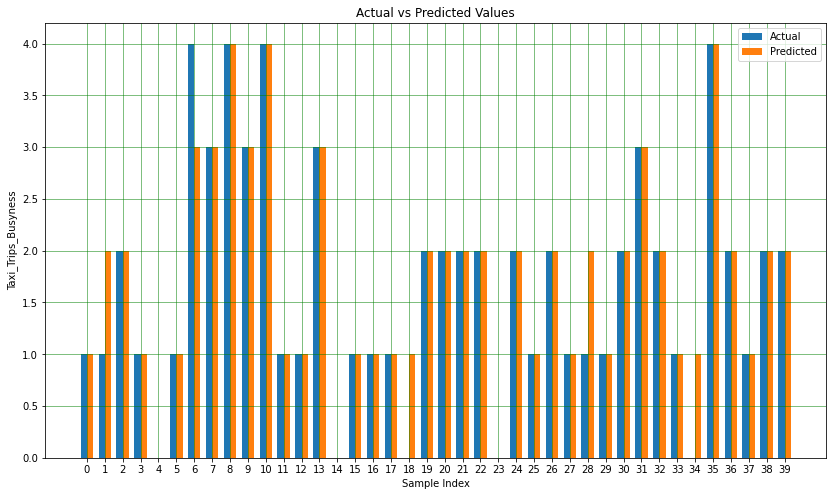

In [46]:
# Sample and reset index
predictions_sample = predictions.sample(40).reset_index(drop=True)

# Create an appropriate range for the x-axis
x = np.arange(len(predictions_sample))

# Define bar width
bar_width = 0.35

# Create subplots
fig, ax = plt.subplots(figsize=(14,8))

# Generate bars for actual and predicted values
rects1 = ax.bar(x - bar_width/2, predictions_sample['Actual'], bar_width, label='Actual')
rects2 = ax.bar(x + bar_width/2, predictions_sample['Predicted'], bar_width, label='Predicted')

# Add some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Sample Index')
ax.set_ylabel('Taxi_Trips_Busyness')
ax.set_title('Actual vs Predicted Values')
ax.set_xticks(x)
ax.legend()

plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [47]:
print("Random Forest Classifier Report: \n", classification_report(y_test, predicted_values))

Random Forest Classifier Report: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93     29448
           1       0.94      0.96      0.95     88093
           2       0.95      0.96      0.95     81997
           3       0.96      0.95      0.96     37835
           4       0.97      0.97      0.97     23020

    accuracy                           0.95    260393
   macro avg       0.96      0.95      0.95    260393
weighted avg       0.95      0.95      0.95    260393



In [48]:
importances = model.feature_importances_

In [49]:
feature_importances = pd.DataFrame({"feature": X.columns, "importance": importances})
feature_importances = feature_importances.sort_values("importance", ascending=False)

In [50]:
print(feature_importances)

       feature  importance
1     latitude    0.356408
0    longitude    0.330827
2         Hour    0.193186
3  Day of Week    0.119580


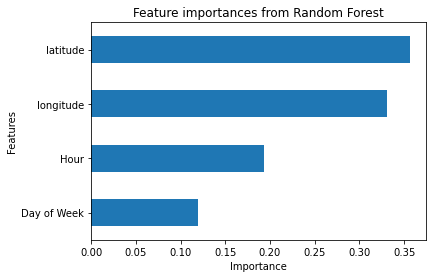

In [51]:
feature_importances.set_index('feature', inplace=True)
feature_importances.sort_values(by="importance", ascending=True, inplace=True)

feature_importances.plot(kind='barh', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature importances from Random Forest')
plt.show()

***

## Testing Other Models

## Decision Tree Classifier

In [52]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Classifier Report: \n", classification_report(y_test, dt_predictions))

Decision Tree Classifier Report: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90     29448
           1       0.91      0.91      0.91     88093
           2       0.91      0.91      0.91     81997
           3       0.91      0.91      0.91     37835
           4       0.95      0.94      0.94     23020

    accuracy                           0.91    260393
   macro avg       0.92      0.91      0.92    260393
weighted avg       0.91      0.91      0.91    260393



## K-Nearest Neighbors Classifier

In [53]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
print("K-Nearest Neighbors Classifier Report: \n", classification_report(y_test, knn_predictions))

K-Nearest Neighbors Classifier Report: 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91     29448
           1       0.94      0.94      0.94     88093
           2       0.94      0.95      0.95     81997
           3       0.94      0.95      0.94     37835
           4       0.95      0.97      0.96     23020

    accuracy                           0.94    260393
   macro avg       0.94      0.94      0.94    260393
weighted avg       0.94      0.94      0.94    260393



## Incorporate more binning values and change to regressional approach

In [54]:
# Create binning values for 50 noise complaint categories to ensure equal distributions 
weekday_df["Taxi_Trips_Busyness"] = pd.qcut(weekday_df["total_weekday_trips"], q=50, labels=False, duplicates='drop')

In [55]:
test = weekday_df["Taxi_Trips_Busyness"]

In [56]:
test.value_counts()

13    32504
28    30471
8     25983
33    25715
35    22641
6     22453
43    21655
5     20085
38    19652
1     18869
2     18811
37    18737
47    18336
0     18139
4     17650
42    17593
45    17379
21    17329
20    16968
48    16868
16    16794
49    16689
15    16635
17    16626
23    16593
18    16590
22    16433
14    16359
19    16093
24    16003
46    15919
12    15789
39    15640
26    15622
25    15461
27    15332
10    14899
3     14740
40    14697
30    14595
31    14217
41    14168
32    14124
11    14094
29    13855
44    13679
9     12879
34    12854
7     11379
36    11378
Name: Taxi_Trips_Busyness, dtype: int64

In [57]:
weekday_df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness
0,-73.982155,40.767937,17,0,50,82.0,45
1,-73.982185,40.768375,17,0,50,82.0,45
2,-73.981796,40.768520,17,0,50,82.0,45
3,-73.982414,40.768234,17,0,50,82.0,45
4,-73.982101,40.768131,17,0,50,82.0,45
...,...,...,...,...,...,...,...
1210481,-73.995300,40.754719,5,2,426,3.0,0
1210483,-73.946228,40.821091,19,2,130,16.0,3
1210484,-74.004143,40.713058,3,4,406,2.0,0
1210485,-73.985336,40.736019,4,2,385,3.0,0


In [58]:
test = weekday_df[weekday_df["Taxi_Trips_Busyness"] == 49]

In [59]:
test

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness
874,-73.994560,40.750526,7,4,65,213.0,49
875,-73.993958,40.751446,7,4,65,213.0,49
876,-73.993950,40.751354,7,4,65,213.0,49
877,-73.994598,40.750450,7,4,65,213.0,49
878,-73.994041,40.751328,7,4,65,213.0,49
...,...,...,...,...,...,...,...
1196099,-73.967049,40.804153,7,1,278,124.0,49
1196100,-73.966759,40.804321,7,1,278,124.0,49
1196101,-73.965843,40.805641,7,1,278,124.0,49
1196102,-73.967300,40.803482,7,1,278,124.0,49


In [60]:
test["Hour"].value_counts()

7     3444
6     2533
8     1979
9     1437
10    1194
21    1085
11     941
19     910
22     810
18     635
12     547
13     416
23     307
20     238
14     110
15     103
Name: Hour, dtype: int64

In [61]:
weekday_df["Taxi_Trips_Busyness"].nunique()

50

## Create the Model for Regression Capabilities

In [62]:
weekday_df["Taxi_Trips_Busyness_Category"] = weekday_df["Taxi_Trips_Busyness"] / 50

In [63]:
weekday_df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness,Taxi_Trips_Busyness_Category
0,-73.982155,40.767937,17,0,50,82.0,45,0.90
1,-73.982185,40.768375,17,0,50,82.0,45,0.90
2,-73.981796,40.768520,17,0,50,82.0,45,0.90
3,-73.982414,40.768234,17,0,50,82.0,45,0.90
4,-73.982101,40.768131,17,0,50,82.0,45,0.90
...,...,...,...,...,...,...,...,...
1210481,-73.995300,40.754719,5,2,426,3.0,0,0.00
1210483,-73.946228,40.821091,19,2,130,16.0,3,0.06
1210484,-74.004143,40.713058,3,4,406,2.0,0,0.00
1210485,-73.985336,40.736019,4,2,385,3.0,0,0.00


In [64]:
weekday_df["Taxi_Trips_Busyness_Category"]

0          0.90
1          0.90
2          0.90
3          0.90
4          0.90
           ... 
1210481    0.00
1210483    0.06
1210484    0.00
1210485    0.00
1210486    0.00
Name: Taxi_Trips_Busyness_Category, Length: 867974, dtype: float64

***

## Model Building and Testing

In [66]:
X = weekday_df[["longitude","latitude","Hour","Day of Week"]]
y = weekday_df["Taxi_Trips_Busyness_Category"]

#### May be beneficial to test the accuracy of other models to train the most optimal solution for our application

In [67]:
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

In [68]:
metrics = {
    "Model": [],
    "RMSE": [],
    "R-squared": [],
    "MAE": [],
    "Training time": []
}

for model_name, model in models.items():
    start = time.time()
    
    model.fit(X_train, y_train)
    
    end = time.time()
    
    model_time = end - start
    
    y_pred = model.predict(X_test)
    
    model_rmse = sqrt(mean_squared_error(y_test, y_pred))
    model_r2 = r2_score(y_test, y_pred)
    model_mae = mean_absolute_error(y_test, y_pred)
    
    metrics["Model"].append(model_name)
    metrics["RMSE"].append(model_rmse)
    metrics["R-squared"].append(model_r2)
    metrics["MAE"].append(model_mae)
    metrics["Training time"].append(model_time)
    
    print(f"{model_name}:\n- RMSE: {model_rmse}\n- R-squared: {model_r2}\n- MAE: {model_mae}\n- Training time: {model_time}\n")

Ridge:
- RMSE: 1.0665238492786866
- R-squared: 0.07585715577411034
- MAE: 0.8560616825661522
- Training time: 0.06057596206665039

Lasso:
- RMSE: 1.0829576261720206
- R-squared: 0.04715800436718287
- MAE: 0.8795503314465992
- Training time: 0.018009185791015625

Decision Tree:
- RMSE: 0.36861799834558356
- R-squared: 0.889604585322628
- MAE: 0.10364333910665802
- Training time: 1.9237251281738281

Random Forest:
- RMSE: 0.26757749415145776
- R-squared: 0.9418302594568908
- MAE: 0.12963025119722882
- Training time: 133.49249005317688

Gradient Boosting:
- RMSE: 0.8772079961276319
- R-squared: 0.37482280763948805
- MAE: 0.708210177981854
- Training time: 35.77945017814636



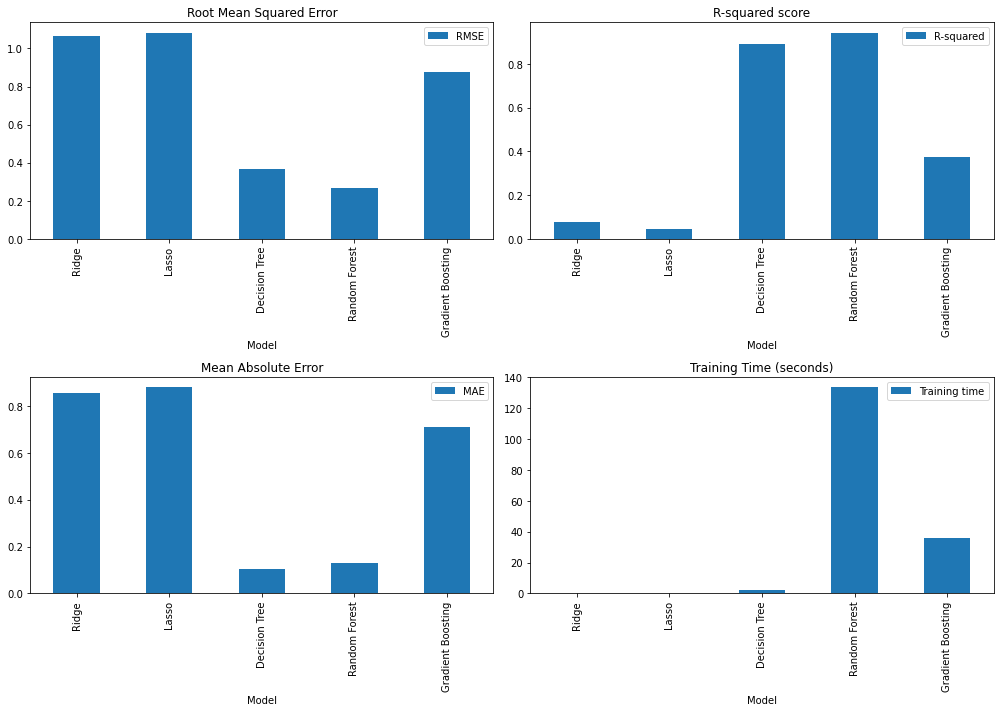

In [69]:
metrics_df = pd.DataFrame(metrics)

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

metrics_df.plot(x="Model", y="RMSE", kind="bar", ax=ax[0, 0])
ax[0, 0].set_title("Root Mean Squared Error")

metrics_df.plot(x="Model", y="R-squared", kind="bar", ax=ax[0, 1])
ax[0, 1].set_title("R-squared score")

metrics_df.plot(x="Model", y="MAE", kind="bar", ax=ax[1, 0])
ax[1, 0].set_title("Mean Absolute Error")

metrics_df.plot(x="Model", y="Training time", kind="bar", ax=ax[1, 1])
ax[1, 1].set_title("Training Time (seconds)")

plt.tight_layout()
plt.show()

#### Evident to see from the above metrics suggest that the Random Forest Regressor, as well as the Classifier model previously, is the most accurate model for our approach to modelling

#### While saying this however, there is a huge contrast between the training time of the Random Forest Regressor and the Decision Tree Regressor - With this being said, I have decided to use the Decision Tree Regressor to enhance the performance based off runtime
* Below is the approach and further analysis of the model to ensure we have made the correct choice

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
dt_model = DecisionTreeRegressor(random_state=36)

In [72]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=36)

In [73]:
y_pred = dt_model.predict(X_test)

In [74]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [75]:
print("Decision Tree - Root Mean Squared Error (RMSE):", rmse)
print("Decision Tree - R-squared score:", r2)
print("Decision Tree - Mean absolute error:", mae)

Decision Tree - Root Mean Squared Error (RMSE): 0.08400791624735895
Decision Tree - R-squared score: 0.9159175508494274
Decision Tree - Mean absolute error: 0.024375010801002496


In [76]:
start_time = time.time()

dt_model = DecisionTreeRegressor(random_state=36)
dt_model = dt_model.fit(X_train, y_train)

end_time = time.time()

dt_time = end_time - start_time
print(f"Time taken to train Random Forest model : {dt_time} seconds")

Time taken to train Random Forest model : 2.395238161087036 seconds


In [77]:
predictions = dt_model.predict(X_test)

In [78]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(df1)

        Actual  Predicted
0         0.44       0.44
1         0.64       0.64
2         0.02       0.28
3         0.12       0.12
4         0.58       0.58
...        ...        ...
173590    0.20       0.20
173591    0.44       0.44
173592    0.10       0.10
173593    0.58       0.58
173594    0.06       0.06

[173595 rows x 2 columns]


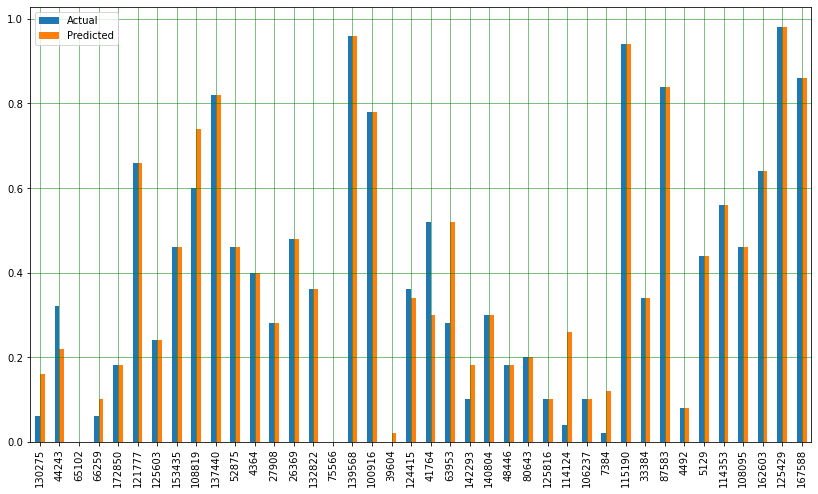

In [79]:
df1.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

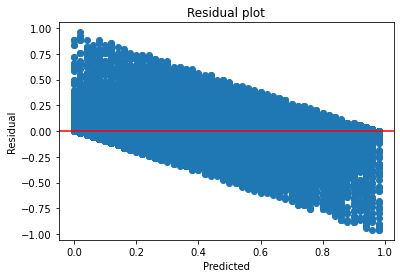

In [80]:
y_pred = dt_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.show()

In [81]:
importances = list(dt_model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

In [82]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: latitude             Importance: 0.35
Variable: longitude            Importance: 0.32
Variable: Hour                 Importance: 0.27
Variable: Day of Week          Importance: 0.07


In [83]:
perm = PermutationImportance(dt_model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.6079 ± 0.0045,latitude
1.5247 ± 0.0075,longitude
1.1087 ± 0.0042,Hour
0.2197 ± 0.0022,Day of Week


### Run a basic test

In [84]:
X_test = [[-73.999474, 40.734135, 11, 2]] # replace this with actual test data
y_test = [0.7] # replace this with actual test data

In [85]:
y_pred = dt_model.predict(X_test)

/Users/conormcelduff/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [86]:
print("Predicted output:", y_pred)

Predicted output: [0.64]


## Final test against the more accurate Random Forest Regressor

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
rf_model = RandomForestRegressor(n_estimators = 5, random_state = 42)

In [89]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=42)

In [90]:
y_pred = rf_model.predict(X_test)

In [91]:
predictions = rf_model.predict(X_test)

In [92]:
df1 = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions})
print(df1)

        Actual  Predicted
0         0.44      0.444
1         0.64      0.640
2         0.02      0.124
3         0.12      0.452
4         0.58      0.580
...        ...        ...
173590    0.20      0.364
173591    0.44      0.488
173592    0.10      0.100
173593    0.58      0.540
173594    0.06      0.156

[173595 rows x 2 columns]


In [93]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [94]:
print("Random Forest - Root Mean Squared Error (RMSE):", rmse)
print("Random Forest - R-squared score:", r2)
print("Random Forest - Mean absolute error:", mae)

Random Forest - Root Mean Squared Error (RMSE): 0.06923539090011674
Random Forest - R-squared score: 0.9428888078987716
Random Forest - Mean absolute error: 0.030194418041994377


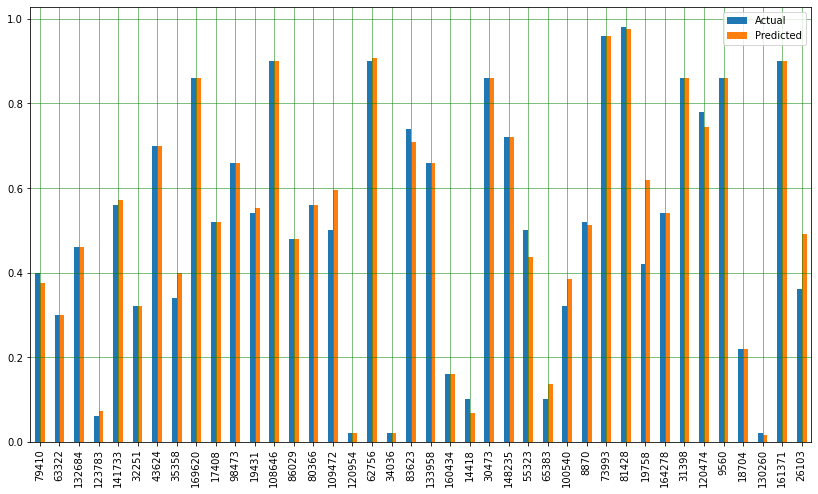

In [95]:
df1.sample(40).plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

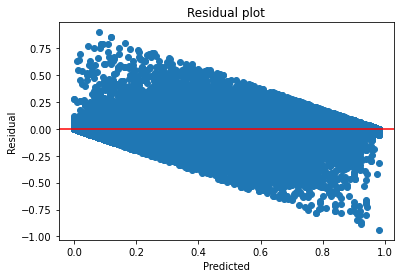

In [96]:
y_pred = rf_model.predict(X_test)

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual plot')
plt.show()

In [97]:
importances = list(rf_model.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

In [98]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))

Variable: latitude             Importance: 0.34
Variable: longitude            Importance: 0.33
Variable: Hour                 Importance: 0.26
Variable: Day of Week          Importance: 0.06


In [99]:
perm = PermutationImportance(rf_model, random_state=1).fit(X_test, y_test)
eli5.show_weights( perm, feature_names = X_test.columns.tolist())

Weight,Feature
1.4705 ± 0.0058,latitude
1.4009 ± 0.0057,longitude
1.0782 ± 0.0038,Hour
0.2038 ± 0.0021,Day of Week


## Create pkl file with RF model

In [100]:
pkl_filename = "rf_weekday_model_noweather.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(rf_model, file)

## Create a CSV file for backend rendering

In [101]:
weekday_df

,longitude,latitude,Hour,Day of Week,cluster_id,total_weekday_trips,Taxi_Trips_Busyness,Taxi_Trips_Busyness_Category
0,-73.982155,40.767937,17,0,50,82.0,45,0.90
1,-73.982185,40.768375,17,0,50,82.0,45,0.90
2,-73.981796,40.768520,17,0,50,82.0,45,0.90
3,-73.982414,40.768234,17,0,50,82.0,45,0.90
4,-73.982101,40.768131,17,0,50,82.0,45,0.90
...,...,...,...,...,...,...,...,...
1210481,-73.995300,40.754719,5,2,426,3.0,0,0.00
1210483,-73.946228,40.821091,19,2,130,16.0,3,0.06
1210484,-74.004143,40.713058,3,4,406,2.0,0,0.00
1210485,-73.985336,40.736019,4,2,385,3.0,0,0.00


In [102]:
weekday_df.to_csv("Weekday_Model_Data_NoWeather.csv")